# Sentiment Analysis

## Sentiment of each line

In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# reading and wragling data
df_avatar = pd.read_csv('avatar.csv', engine='python')
df_avatar_lines = df_avatar.groupby('character').count()
df_avatar_lines = df_avatar_lines.sort_values(by=['character_words'], ascending=False)[:10]
top_character_names = df_avatar_lines.index.values

# filtering out non-top characters
df_character_sentiment = df_avatar[df_avatar['character'].isin(top_character_names)]
df_character_sentiment = df_character_sentiment[['character', 'character_words']]

# calculating sentiment score
sid = SentimentIntensityAnalyzer()
df_character_sentiment.reset_index(inplace=True, drop=True)
df_character_sentiment[['neg', 'neu', 'pos', 'compound']] = df_character_sentiment['character_words'].apply(sid.polarity_scores).apply(pd.Series)
df_character_sentiment

,character,character_words,neg,neu,pos,compound
0,Katara,Water. Earth. Fire. Air. My grandmother used t...,0.130,0.804,0.066,-0.6874
1,Sokka,It's not getting away from me this time. Watc...,0.000,1.000,0.000,0.0000
2,Katara,"Sokka, look!",0.000,1.000,0.000,0.0000
3,Sokka,"Sshh! Katara, you're going to scare it away. ...",0.200,0.800,0.000,-0.5411
4,Katara,"But, Sokka! I caught one!",0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
7053,Zuko,At least you don't look like a boar-q-pine! My...,0.183,0.817,0.000,-0.4007
7054,Suki,And why did you paint me firebending?,0.000,1.000,0.000,0.0000
7055,Sokka,I thought it looked more exciting that way. O...,0.000,0.687,0.313,0.7501
7056,Iroh,"Hey, my belly's not that big anymore. I've rea...",0.000,1.000,0.000,0.0000


## Sentiment of each character

In [2]:
# sentiment score for each character (mean)
df_character_sentiment = df_character_sentiment.groupby('character').mean().round(3).sort_values('pos', ascending=True)
df_character_sentiment.reset_index(inplace=True)
df_character_sentiment

,character,neg,neu,pos,compound
0,Zuko,0.099,0.789,0.111,0.026
1,Zhao,0.136,0.752,0.112,-0.051
2,Sokka,0.096,0.789,0.115,0.024
3,Katara,0.091,0.787,0.122,0.046
4,Azula,0.090,0.783,0.127,0.080
5,Suki,0.090,0.783,0.127,0.089
6,Jet,0.090,0.777,0.133,0.063
7,Toph,0.084,0.776,0.140,0.078
8,Aang,0.075,0.782,0.143,0.084
9,Iroh,0.077,0.755,0.168,0.164


## Plotting sentiment

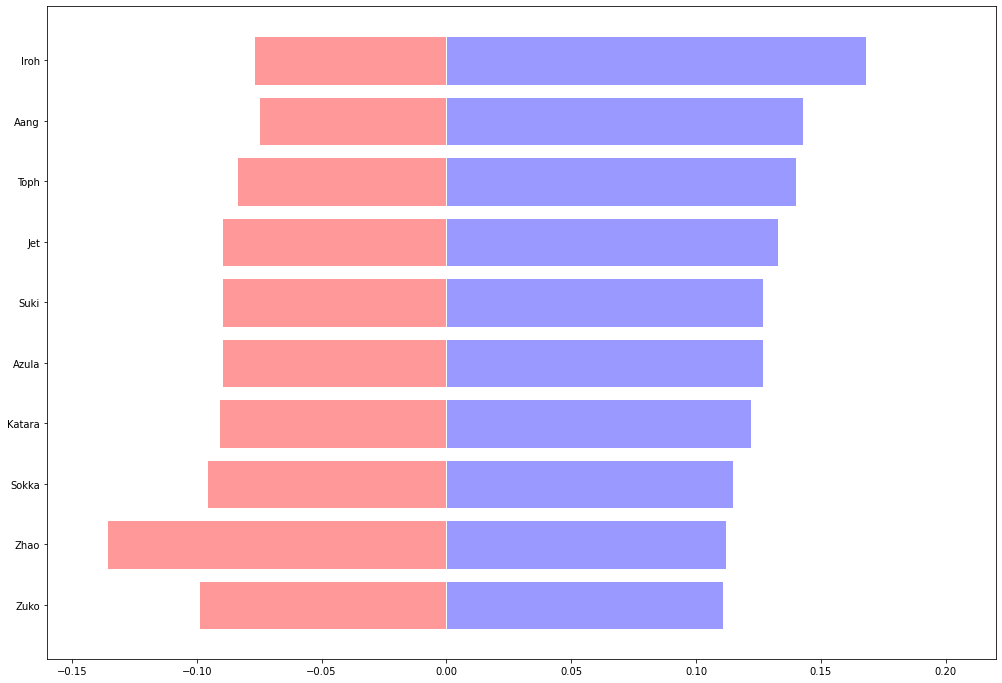

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# preparing data
X = np.arange(len(df_character_sentiment['pos']))
#bar plot
fig = plt.figure(figsize = (17, 12))
plt.barh(X, df_character_sentiment['pos'], facecolor='#9999ff', edgecolor='white')
plt.barh(X, -df_character_sentiment['neg'], facecolor='#ff9999', edgecolor='white')
# plt.rcParams.update({'font.size':13})
plt.xlim([-.16,.22])
plt.yticks(ticks=X, labels=df_character_sentiment['character'], rotation='0')
plt.show()

# Named Entity Recognition (NER)

In [4]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Biden invites Ukrainian president to White House this summer")
print([(X.text, X.label_) for X in doc.ents])

[('Biden', 'PERSON'), ('Ukrainian', 'GPE'), ('White House', 'ORG'), ('this summer', 'DATE')]


# Stemming

In [5]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
# PorterStemmer
porter = PorterStemmer()
# LancasterStemmer
lancaster = LancasterStemmer()
print(porter.stem("friendship"))
print(lancaster.stem("friendship"))

friendship
friend


# Lemmatization

In [6]:
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
words = ['articles', 'friendship', 'studies', 'phones']
for word in words:
    print(lemmatizer.lemmatize(word))

article
friendship
study
phone


In [7]:
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
words = ['be', 'is', 'are', 'were', 'was']
for word in words:
    print(lemmatizer.lemmatize(word, pos='v'))

be
be
be
be
be


# Bag of Words (BoW)

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text'])
df_dtm = pd.DataFrame(cv_matrix.toarray(),
                      index=df['review'].values,
                      columns=cv.get_feature_names())
df_dtm

,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
review2,2,2,2,0,0,1


# TF-IDF

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
tfidf = TfidfVectorizer(stop_words='english', norm=None)
tfidf_matrix = tfidf.fit_transform(df['text'])
df_dtm = pd.DataFrame(tfidf_matrix.toarray(),
                      index=df['review'].values,
                      columns=tfidf.get_feature_names())
df_dtm

,code,hate,java,love,python,writing
review1,2.0,0.00000,0.00000,2.81093,2.81093,1.0
review2,2.0,2.81093,2.81093,0.00000,0.00000,1.0


# Wordcloud

In [10]:
import stylecloud

stylecloud.gen_stylecloud(file_path='SJ-Speech.txt',
                          icon_name= "fas fa-apple-alt")